<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:250%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;">AIRLINE CUSTOMER SEGMENTATION ✈️🎯</p>

<div style="background-color:#000000; border-radius:8px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;border-width: 2px;">
    <img src="https://media1.tenor.com/m/MArtmCi0hlMAAAAC/computer-science-c-code.gif" alt="Animated GIF">
</div>

<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:150%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;"> IMPORT DEPENDENCIES</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('/kaggle/input/sa-customer-segmentation/flight_train.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:150%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;">DATA PRE-PROCESSING AND EDA</p>

In [3]:
df.shape

(55000, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

In [5]:
nums = df.select_dtypes(include=[np.number], exclude=[bool]).columns
cats = df.select_dtypes(exclude=[np.number, bool]).columns

In [6]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,55000.0,31549.707145,18177.005101,1.000000,15798.750000,31559.500000,47322.250000,62988.0
FFP_TIER,55000.0,4.115727,0.395579,4.000000,4.000000,4.000000,4.000000,6.0
AGE,54658.0,42.705789,9.803796,6.000000,35.000000,42.000000,48.000000,110.0
FLIGHT_COUNT,55000.0,13.213527,14.528764,2.000000,4.000000,8.000000,16.000000,213.0
BP_SUM,55000.0,12362.465164,17012.468908,0.000000,3497.000000,6903.000000,14481.000000,505308.0
SUM_YR_1,54738.0,6002.575145,8458.072660,0.000000,1400.000000,3426.500000,7406.000000,239560.0
SUM_YR_2,54937.0,6325.644993,9080.805391,0.000000,1300.000000,3484.000000,7760.000000,234188.0
SEG_KM_SUM,55000.0,19256.688255,21613.796416,1380.000000,6332.000000,11983.000000,23761.500000,580717.0
LAST_TO_END,55000.0,155.593436,169.987954,1.000000,25.000000,91.000000,226.000000,730.0
AVG_INTERVAL,55000.0,62.979631,64.506386,0.000000,25.166667,44.600000,77.500000,714.0


In [7]:
df[cats].describe().T

,count,unique,top,freq
FFP_DATE,55000,3067,1/13/2011,140
FIRST_FLIGHT_DATE,55000,3395,9/9/2005,76
GENDER,54997,2,Male,42504
WORK_CITY,53034,2956,guangzhou,8348
WORK_PROVINCE,52216,1061,guangdong,15388
WORK_COUNTRY,54980,110,CN,50413
LOAD_TIME,55000,1,3/31/2014,55000
LAST_FLIGHT_DATE,55000,729,3/31/2014,929


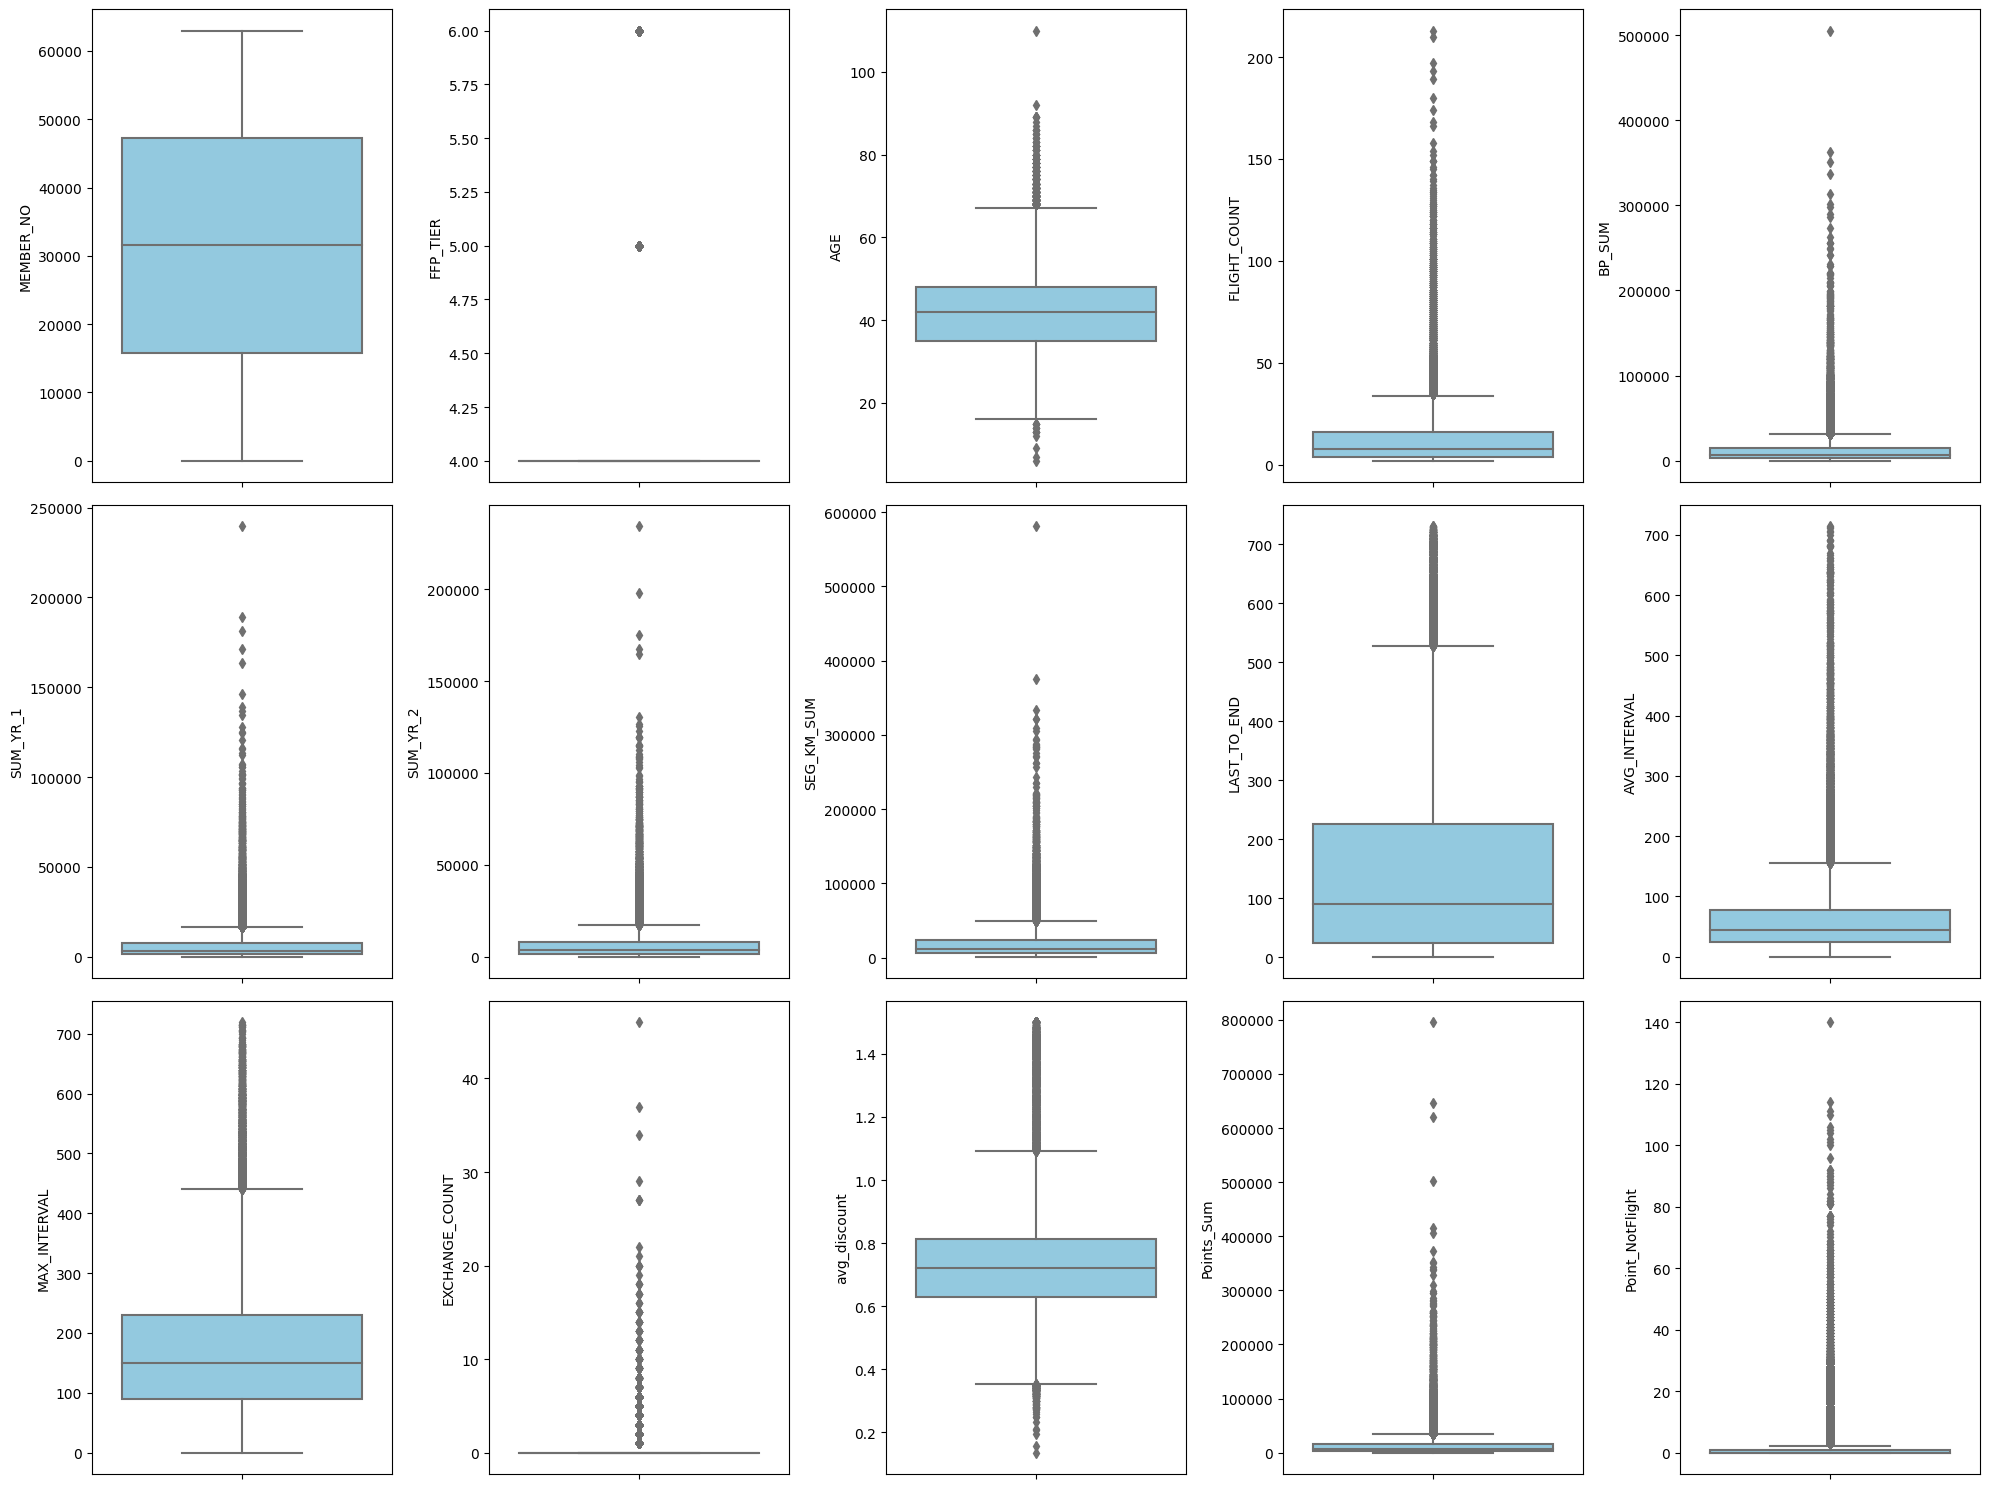

In [8]:
plt.figure(figsize=(20,15))
features = nums
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

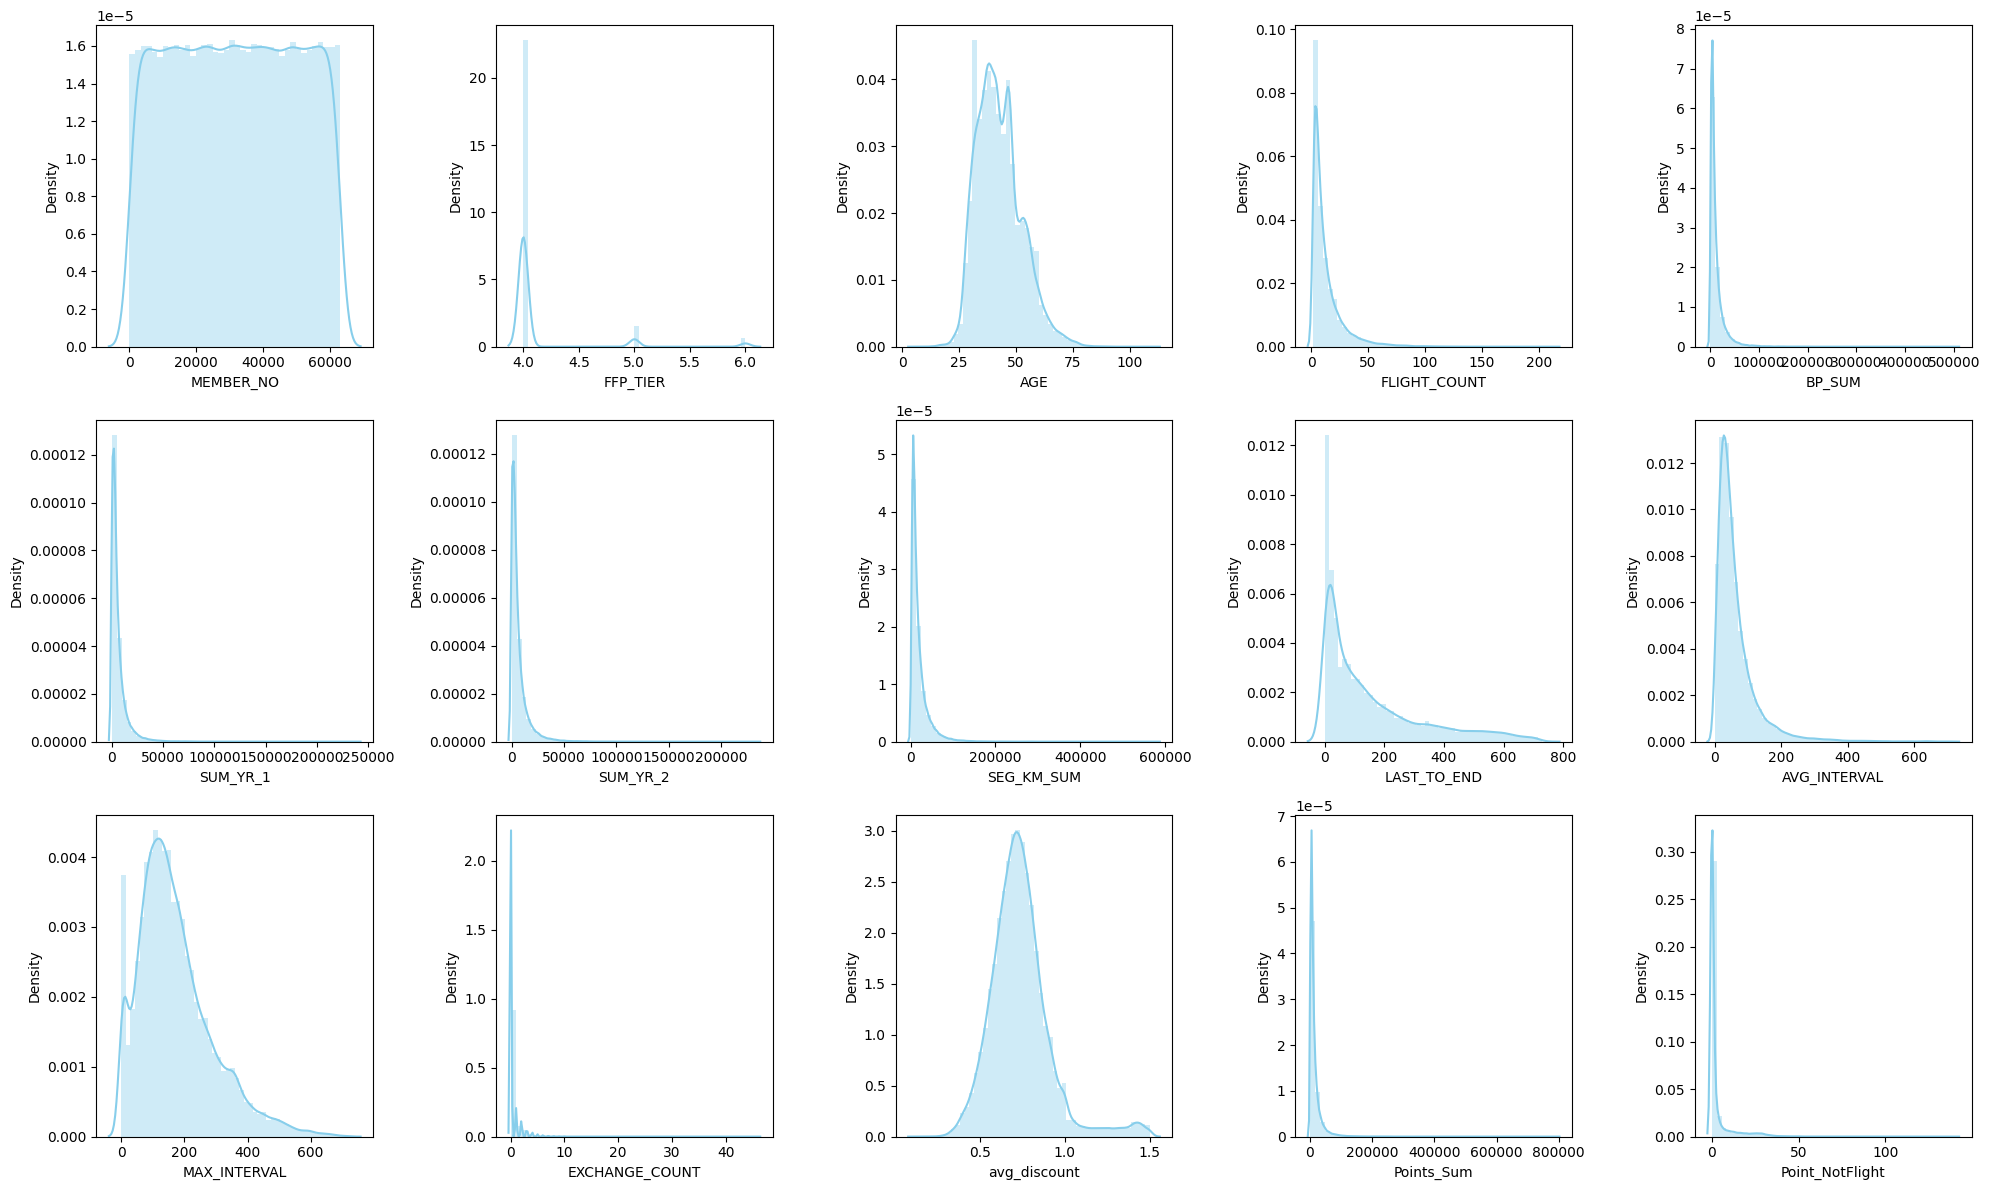

In [9]:
plt.figure(figsize=(20,12))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

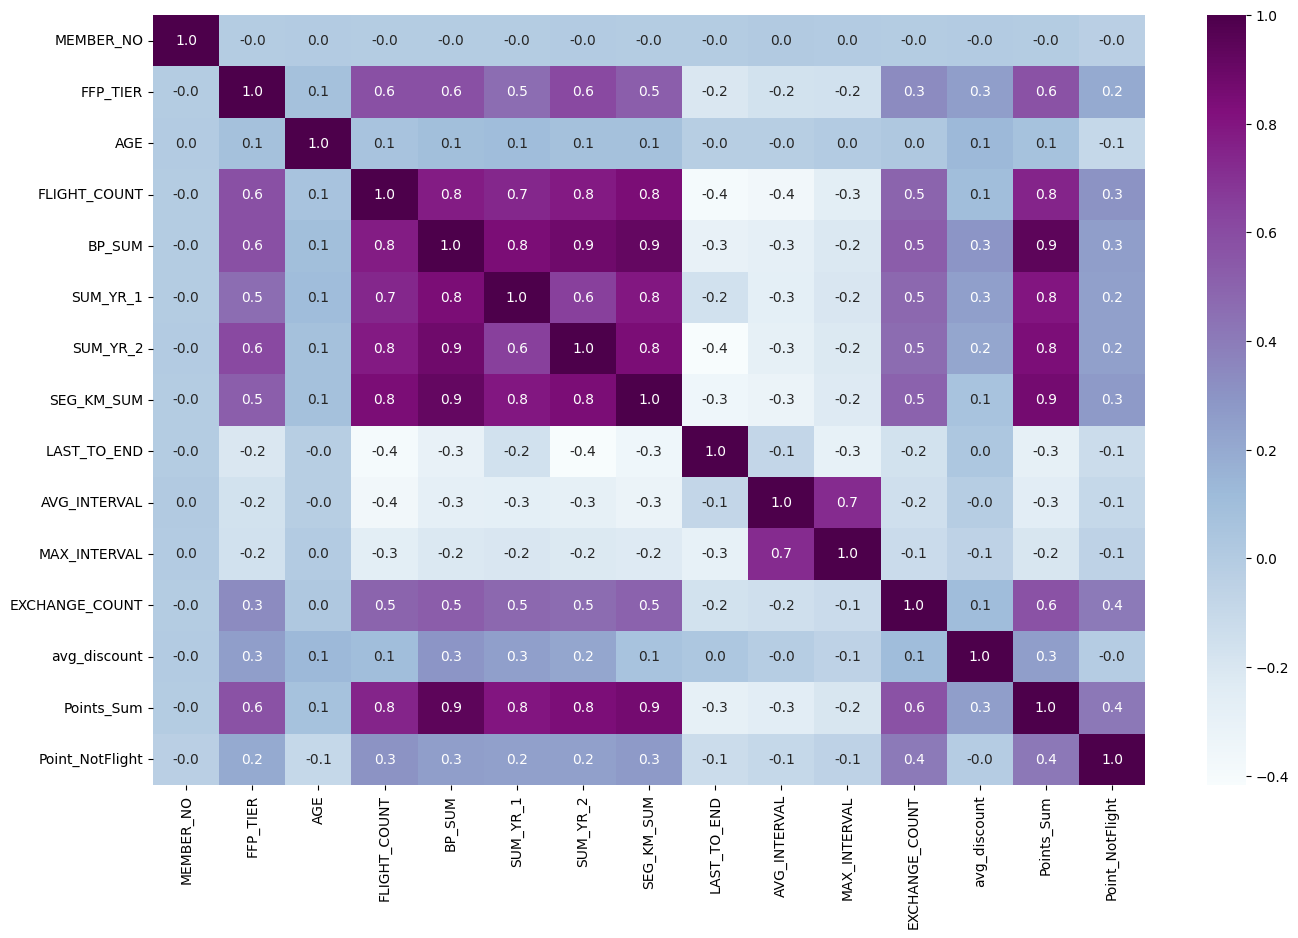

In [10]:
corr_matrix = df[nums].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="BuPu")
plt.show()

In [11]:
dff = df.copy() 

In [12]:
dff.duplicated().sum()

0

In [13]:
percent_missing = dff.isnull().sum() * 100 / len(dff)
missing_value = pd.DataFrame({'percent_missing': percent_missing})
missing_value

,percent_missing
MEMBER_NO,0.000000
FFP_DATE,0.000000
FIRST_FLIGHT_DATE,0.000000
GENDER,0.005455
FFP_TIER,0.000000
WORK_CITY,3.574545
WORK_PROVINCE,5.061818
WORK_COUNTRY,0.036364
AGE,0.621818
LOAD_TIME,0.000000


In [14]:
#replace missing value with mean
dff['AGE']      = dff['AGE'].fillna(dff['AGE'].mean())
dff['SUM_YR_1'] = dff['SUM_YR_1'].fillna(dff['SUM_YR_1'].mean())
dff['SUM_YR_2'] = dff['SUM_YR_2'].fillna(dff['SUM_YR_2'].mean())

In [15]:
#delete work_city, work_province, work_country, gender columns
dff = dff.drop(['MEMBER_NO','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [16]:
#Check the missing values again
dff.isnull().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [17]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           55000 non-null  object 
 1   FIRST_FLIGHT_DATE  55000 non-null  object 
 2   FFP_TIER           55000 non-null  int64  
 3   AGE                55000 non-null  float64
 4   LOAD_TIME          55000 non-null  object 
 5   FLIGHT_COUNT       55000 non-null  int64  
 6   BP_SUM             55000 non-null  int64  
 7   SUM_YR_1           55000 non-null  float64
 8   SUM_YR_2           55000 non-null  float64
 9   SEG_KM_SUM         55000 non-null  int64  
 10  LAST_FLIGHT_DATE   55000 non-null  object 
 11  LAST_TO_END        55000 non-null  int64  
 12  AVG_INTERVAL       55000 non-null  float64
 13  MAX_INTERVAL       55000 non-null  int64  
 14  EXCHANGE_COUNT     55000 non-null  int64  
 15  avg_discount       55000 non-null  float64
 16  Points_Sum         550

In [18]:
dff['FFP_DATE']         = pd.to_datetime(dff['FFP_DATE'],errors='coerce')
dff['FIRST_FLIGHT_DATE']= pd.to_datetime(dff['FIRST_FLIGHT_DATE'],errors='coerce')
dff['LOAD_TIME']        = pd.to_datetime(dff['LOAD_TIME'],errors='coerce')

In [19]:
#change 2014/2/29 to 2019/2/28 because 2014 is not a leap year
dff['LAST_FLIGHT_DATE'] = dff['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')
dff['LAST_FLIGHT_DATE'] = pd.to_datetime(dff['LAST_FLIGHT_DATE'], errors='coerce')

In [20]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           55000 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  55000 non-null  datetime64[ns]
 2   FFP_TIER           55000 non-null  int64         
 3   AGE                55000 non-null  float64       
 4   LOAD_TIME          55000 non-null  datetime64[ns]
 5   FLIGHT_COUNT       55000 non-null  int64         
 6   BP_SUM             55000 non-null  int64         
 7   SUM_YR_1           55000 non-null  float64       
 8   SUM_YR_2           55000 non-null  float64       
 9   SEG_KM_SUM         55000 non-null  int64         
 10  LAST_FLIGHT_DATE   54600 non-null  datetime64[ns]
 11  LAST_TO_END        55000 non-null  int64         
 12  AVG_INTERVAL       55000 non-null  float64       
 13  MAX_INTERVAL       55000 non-null  int64         
 14  EXCHAN

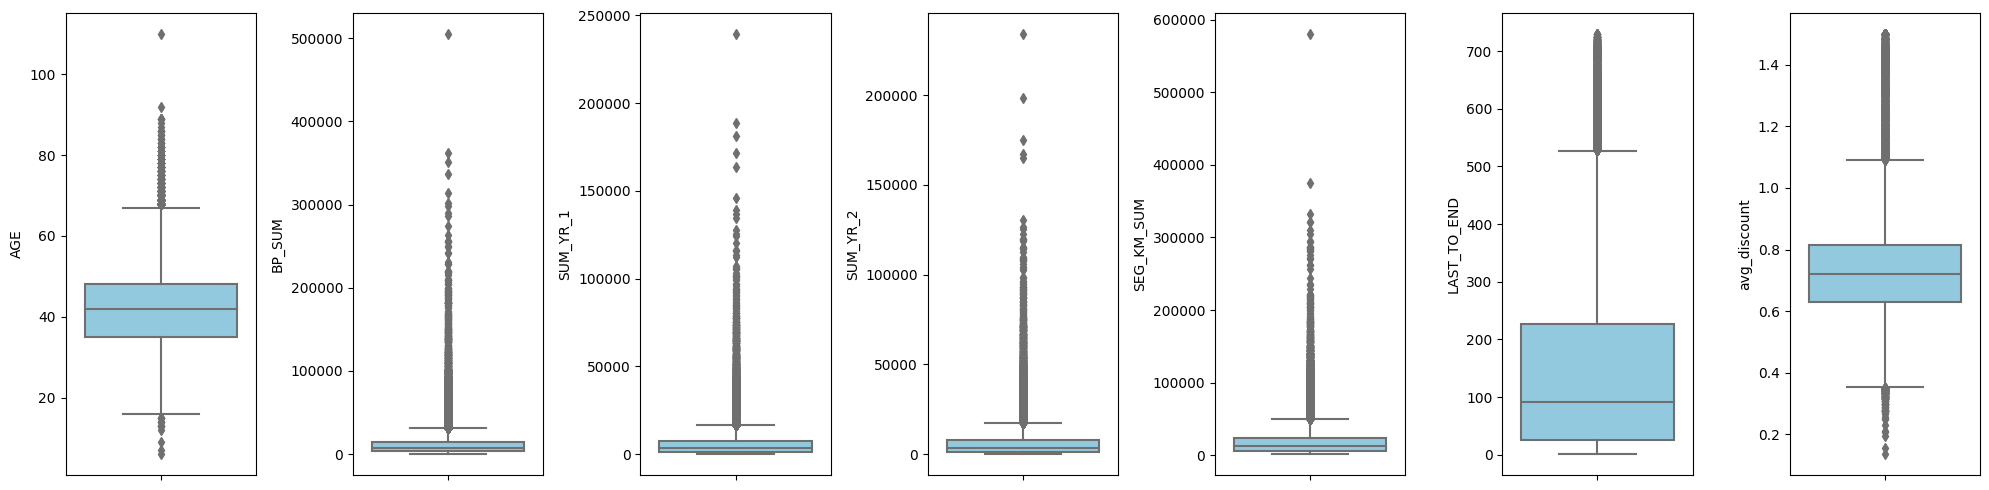

In [21]:
plt.figure(figsize=(20,5))
features = ['AGE', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'avg_discount']
for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

In [22]:
#filter so the dataset has no extreme value
dff = dff[dff['BP_SUM']      <= 40_000]
dff = dff[dff['SUM_YR_1']    <= 25_000]
dff = dff[dff['SUM_YR_2']    <= 25_000]
dff = dff[dff['SEG_KM_SUM']  <= 50_000]

In [23]:
#filter customer with strange age
dff = dff[dff['AGE'] >= 17]

In [24]:
dff.shape

(50163, 18)

In [25]:
data = dff[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
data.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
2744,2014-03-31,2008-08-14,256,26,32160,1.420642
2776,2014-03-31,2005-12-03,115,26,35705,1.271262
2897,2014-03-31,2008-03-02,7,48,47686,0.935792
3004,2014-03-31,2007-02-01,17,24,31651,1.382806
3026,2014-03-31,2012-01-06,18,37,48135,0.907022


In [26]:
data['L'] = data['LOAD_TIME'] - data['FFP_DATE']
data['L'] = (data['L'].astype(str).str.split().str[0]).astype(int)

In [27]:
data = data[['L', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
data.columns = ['L','R','F','M','C']
data.head()

,L,R,F,M,C
2744,2055,256,26,32160,1.420642
2776,3040,115,26,35705,1.271262
2897,2220,7,48,47686,0.935792
3004,2615,17,24,31651,1.382806
3026,815,18,37,48135,0.907022


In [28]:
sc = StandardScaler()
data_std = sc.fit_transform(data.astype(float))

In [29]:
data_std = pd.DataFrame(data=data_std, columns=data.columns)
data_std.head()

,L,R,F,M,C
0,0.688861,0.517924,1.869079,1.683920,4.064640
1,1.863017,-0.299425,1.869079,2.016938,3.187549
2,0.885547,-0.925479,4.472442,3.142435,1.217830
3,1.356401,-0.867511,1.632409,1.636104,3.842480
4,-0.789264,-0.861714,3.170760,3.184614,1.048904


<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:150%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;">SEGMENTATION</p>

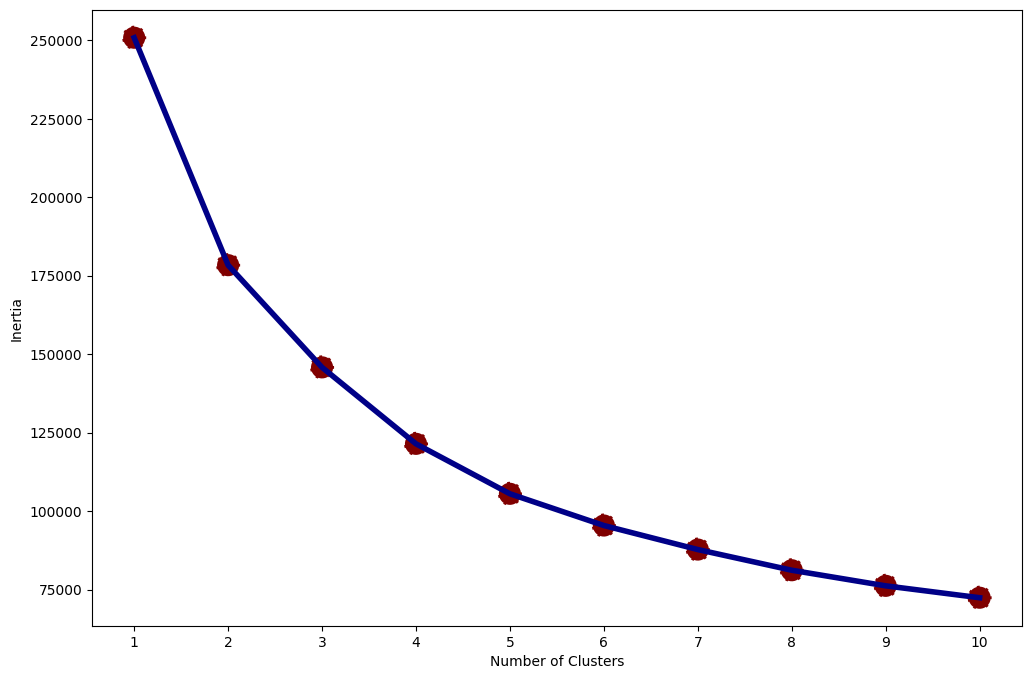

In [30]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [31]:
data_std_4 = data_std.copy()
kmeans_4   = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(data_std_4)

KMeans(n_clusters=4, random_state=0)

In [32]:
data_std_4['clusters'] = kmeans_4.labels_
data_std_4.head()

,L,R,F,M,C,clusters
0,0.688861,0.517924,1.869079,1.683920,4.064640,2
1,1.863017,-0.299425,1.869079,2.016938,3.187549,2
2,0.885547,-0.925479,4.472442,3.142435,1.217830,2
3,1.356401,-0.867511,1.632409,1.636104,3.842480,2
4,-0.789264,-0.861714,3.170760,3.184614,1.048904,2


In [33]:
radar_plot_4 = data_std_4.groupby('clusters').agg('median').reset_index()
radar_plot_4

,clusters,L,R,F,M,C
0,0,-0.784496,-0.450141,-0.379281,-0.411980,-0.206130
1,1,-0.535360,1.717861,-0.734285,-0.828041,0.155968
2,2,0.085691,-0.803746,1.514075,1.559355,-0.059089
3,3,1.115610,-0.397970,-0.379281,-0.378020,-0.027138


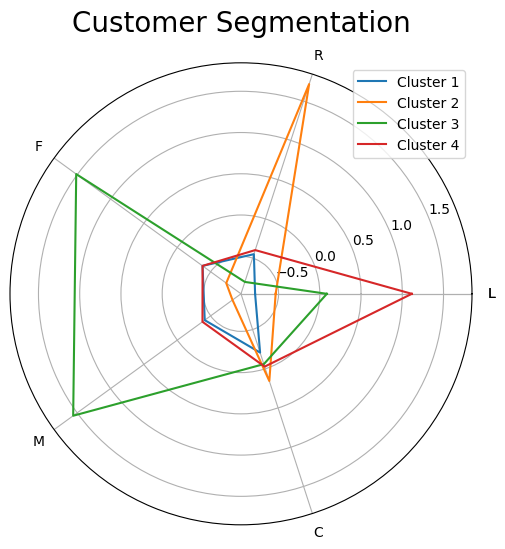

In [34]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
clusters = []

for i in range(0,4):
    num = []
    for cat in category:
        num.append(radar_plot_4[cat][i])
    num.append(radar_plot_4['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

for i in range(0,4):
    plt.plot(label_loc, clusters[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

<Axes: xlabel='PC 1', ylabel='PC 2'>

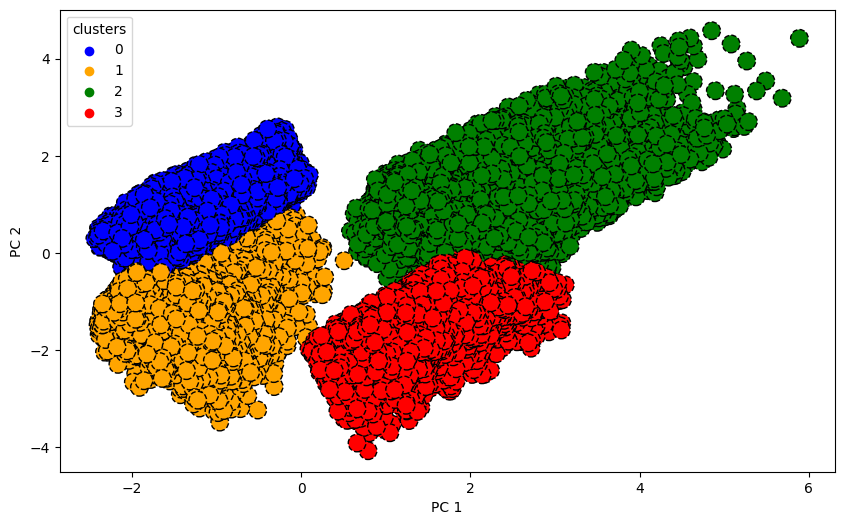

In [35]:
pca = PCA(n_components=2)

pca.fit(data_std_4)
pcs = pca.transform(data_std_4)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std_4['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red'],
    s=160,
    ax=ax
)

In [36]:
data_std_5 = data_std.copy()
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(data_std_5)

KMeans(n_clusters=5, random_state=0)

In [37]:
data_std_5['clusters'] = kmeans_5.labels_
data_std_5.head()

,L,R,F,M,C,clusters
0,0.688861,0.517924,1.869079,1.683920,4.064640,3
1,1.863017,-0.299425,1.869079,2.016938,3.187549,2
2,0.885547,-0.925479,4.472442,3.142435,1.217830,2
3,1.356401,-0.867511,1.632409,1.636104,3.842480,3
4,-0.789264,-0.861714,3.170760,3.184614,1.048904,2


In [38]:
radar_plot_5 = data_std_5.groupby('clusters').agg('median').reset_index()
radar_plot_5

,clusters,L,R,F,M,C
0,0,-0.546089,1.746845,-0.734285,-0.820995,0.046616
1,1,1.135279,-0.409564,-0.379281,-0.357213,-0.155747
2,2,0.085691,-0.803746,1.514075,1.588195,-0.060917
3,3,-0.025765,-0.113927,-0.615950,-0.635604,2.380267
4,4,-0.786880,-0.455938,-0.379281,-0.402069,-0.219918


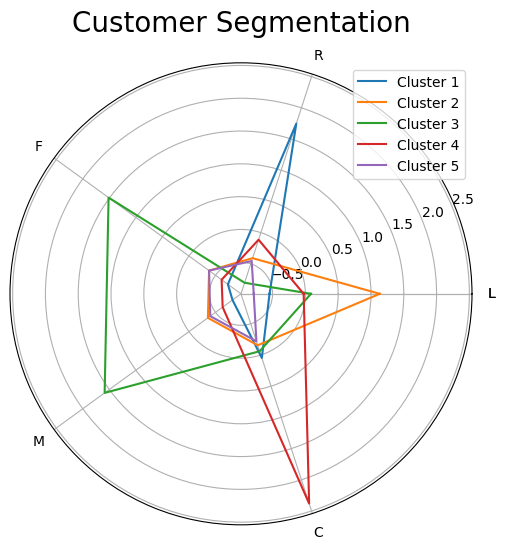

In [39]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
clusters = []

for i in range(0,5):
    num = []
    for cat in category:
        num.append(radar_plot_5[cat][i])
    num.append(radar_plot_5['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)
for i in range(0,5):
    plt.plot(label_loc, clusters[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

<Axes: xlabel='PC 1', ylabel='PC 2'>

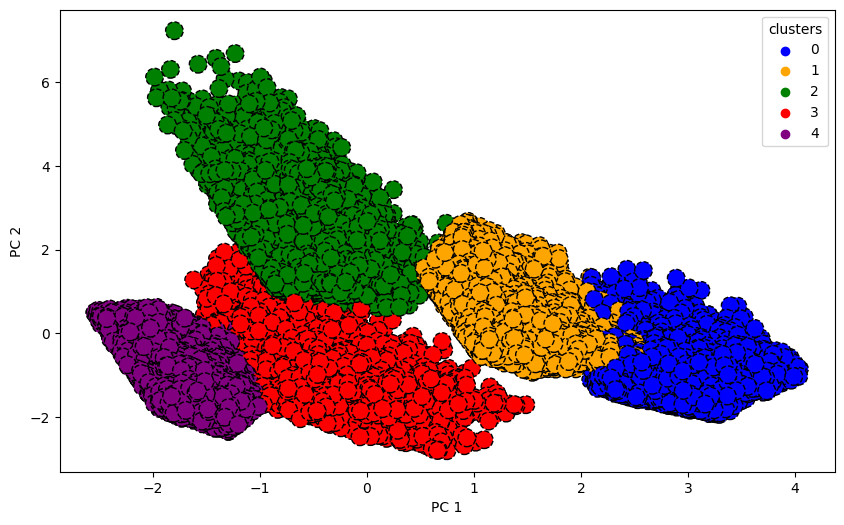

In [40]:
pca = PCA(n_components=2)

pca.fit(data_std_5)
pcs = pca.transform(data_std_5)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std_5['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple'],
    s=160,
    ax=ax
)

In [41]:
data_std_6 = data_std.copy()
kmeans_6 = KMeans(n_clusters=6, random_state=0)
kmeans_6.fit(data_std_6)

KMeans(n_clusters=6, random_state=0)

In [42]:
data_std_6['clusters'] = kmeans_6.labels_
data_std_6.head()

,L,R,F,M,C,clusters
0,0.688861,0.517924,1.869079,1.683920,4.064640,0
1,1.863017,-0.299425,1.869079,2.016938,3.187549,3
2,0.885547,-0.925479,4.472442,3.142435,1.217830,3
3,1.356401,-0.867511,1.632409,1.636104,3.842480,0
4,-0.789264,-0.861714,3.170760,3.184614,1.048904,3


In [43]:
radar_plot_6 = data_std_6.groupby('clusters').agg('median').reset_index()
radar_plot_6

,clusters,L,R,F,M,C
0,0,0.050525,-0.212473,-0.497615,-0.566276,2.914263
1,1,-0.798801,-0.334205,-0.497615,-0.599860,-0.220705
2,2,-0.583042,-0.710997,0.567397,0.694542,-0.136835
3,3,0.717470,-0.826933,1.987413,1.998619,-0.029900
4,4,-0.515096,1.799016,-0.734285,-0.820901,0.099562
5,5,1.175212,-0.397970,-0.379281,-0.373887,-0.137289


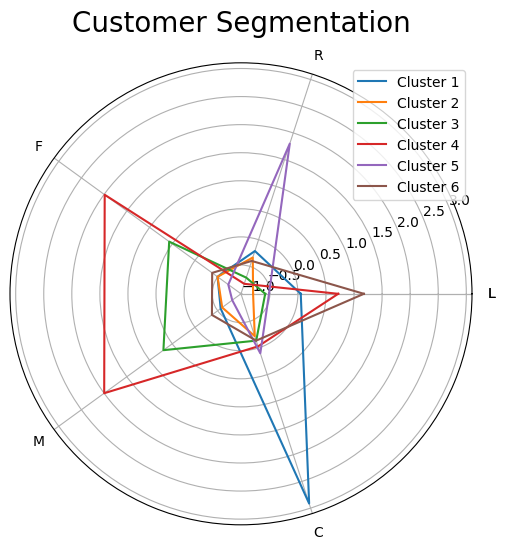

In [44]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
clusters = []

for i in range(0,6):
    num = []
    for cat in category:
        num.append(radar_plot_6[cat][i])
    num.append(radar_plot_6['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

for i in range(0,6):
    plt.plot(label_loc, clusters[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

<Axes: xlabel='PC 1', ylabel='PC 2'>

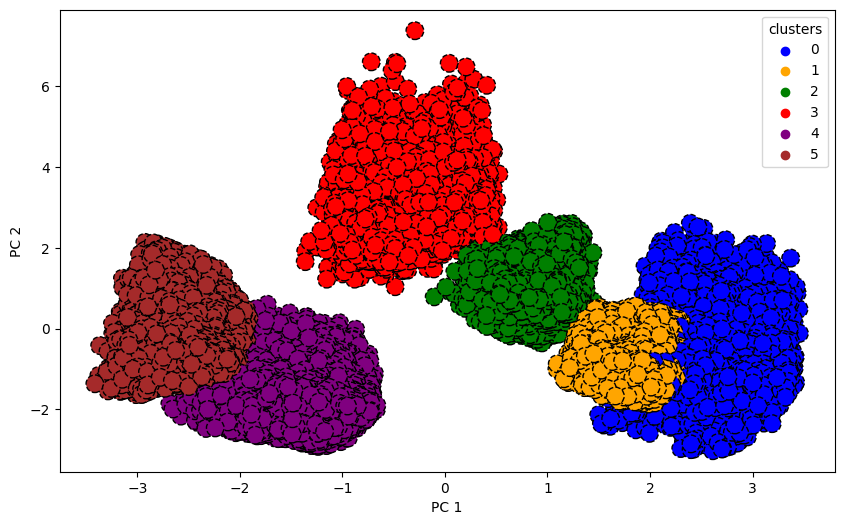

In [45]:
pca = PCA(n_components=2)

pca.fit(data_std_6)
pcs = pca.transform(data_std_6)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std_6['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple', 'brown'],
    s=160,
    ax=ax
)

In [46]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data_std)

KMeans(n_clusters=5, random_state=0)

In [47]:
data_std['clusters'] = kmeans.labels_
data_std.head()

,L,R,F,M,C,clusters
0,0.688861,0.517924,1.869079,1.683920,4.064640,3
1,1.863017,-0.299425,1.869079,2.016938,3.187549,2
2,0.885547,-0.925479,4.472442,3.142435,1.217830,2
3,1.356401,-0.867511,1.632409,1.636104,3.842480,3
4,-0.789264,-0.861714,3.170760,3.184614,1.048904,2


In [48]:
radar_plot = data_std.groupby('clusters').agg('median').reset_index()
radar_plot

,clusters,L,R,F,M,C
0,0,-0.546089,1.746845,-0.734285,-0.820995,0.046616
1,1,1.135279,-0.409564,-0.379281,-0.357213,-0.155747
2,2,0.085691,-0.803746,1.514075,1.588195,-0.060917
3,3,-0.025765,-0.113927,-0.615950,-0.635604,2.380267
4,4,-0.786880,-0.455938,-0.379281,-0.402069,-0.219918


In [49]:
print(f'Inertia (n=5): {kmeans.inertia_}')

Inertia (n=5): 105518.82920951102


In [50]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,-0.732558,1.870336,3
1,0.014211,3.003030,2
2,-1.145982,5.182299,2
3,-1.074489,2.337682,3
4,-1.346672,3.843177,2


<Axes: xlabel='PC 1', ylabel='PC 2'>

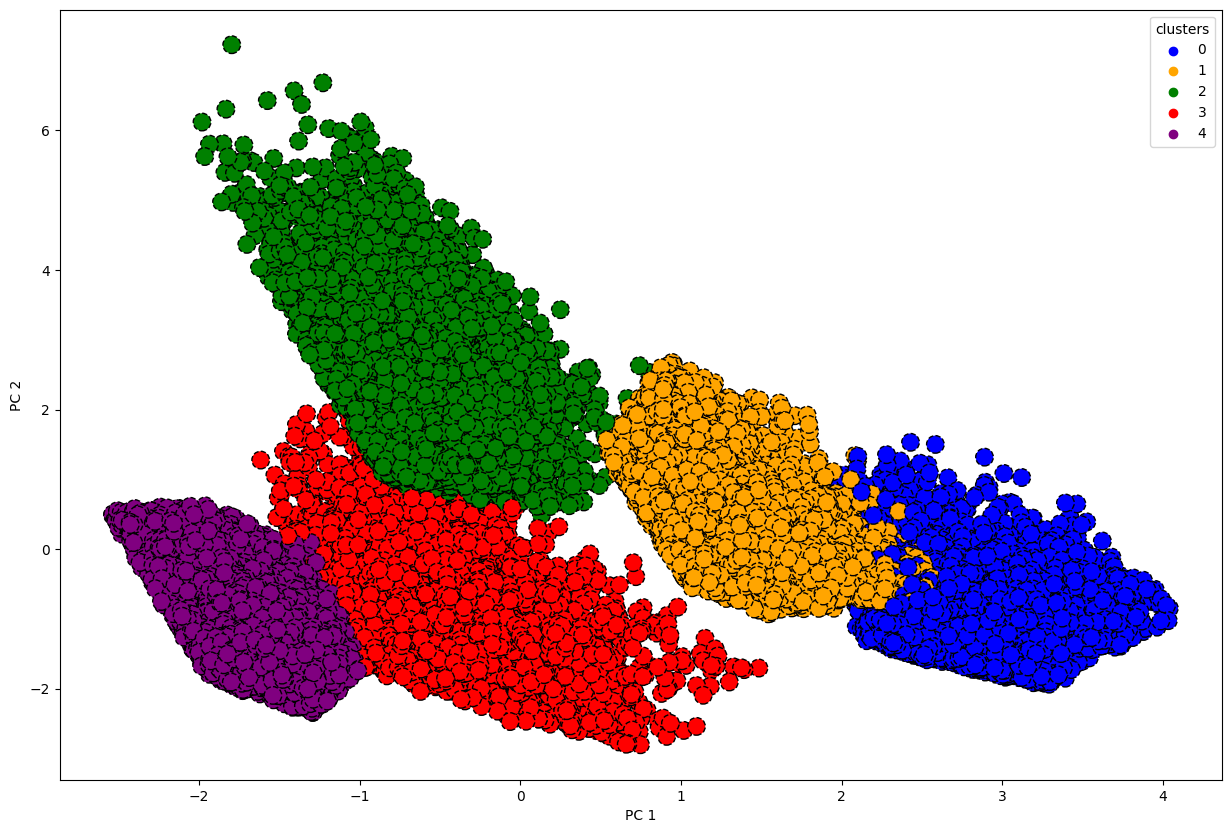

In [51]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple'],
    s=160,
    ax=ax
)

In [52]:
summary = data_std.groupby('clusters').agg('median').reset_index()
display(summary)

,clusters,L,R,F,M,C
0,0,-0.546089,1.746845,-0.734285,-0.820995,0.046616
1,1,1.135279,-0.409564,-0.379281,-0.357213,-0.155747
2,2,0.085691,-0.803746,1.514075,1.588195,-0.060917
3,3,-0.025765,-0.113927,-0.615950,-0.635604,2.380267
4,4,-0.786880,-0.455938,-0.379281,-0.402069,-0.219918


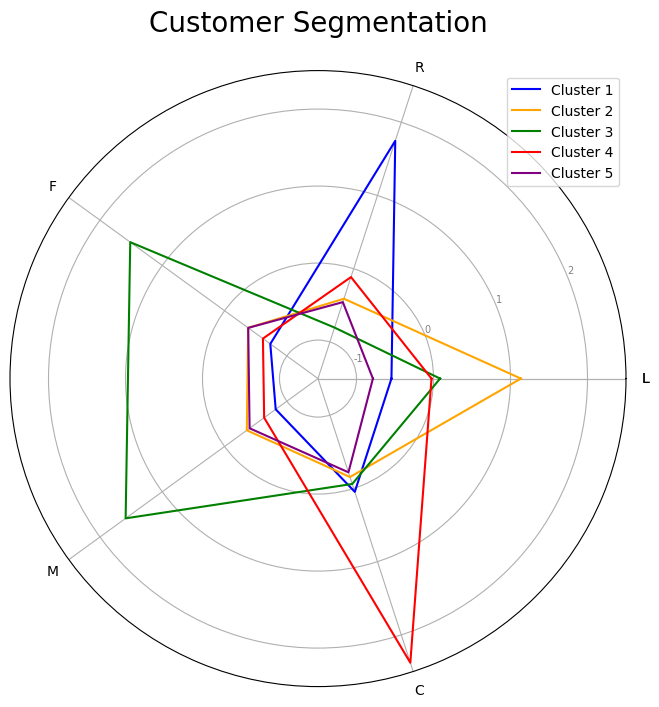

In [53]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
color = ['blue', 'orange', 'green', 'red', 'purple']
clusters = []

for i in range(0,5):
    num = []
    for cat in category:
        num.append(radar_plot[cat][i])
    num.append(radar_plot['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
for i in range(0,5):
    plt.plot(label_loc, clusters[i], color=color[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.legend()
plt.show()

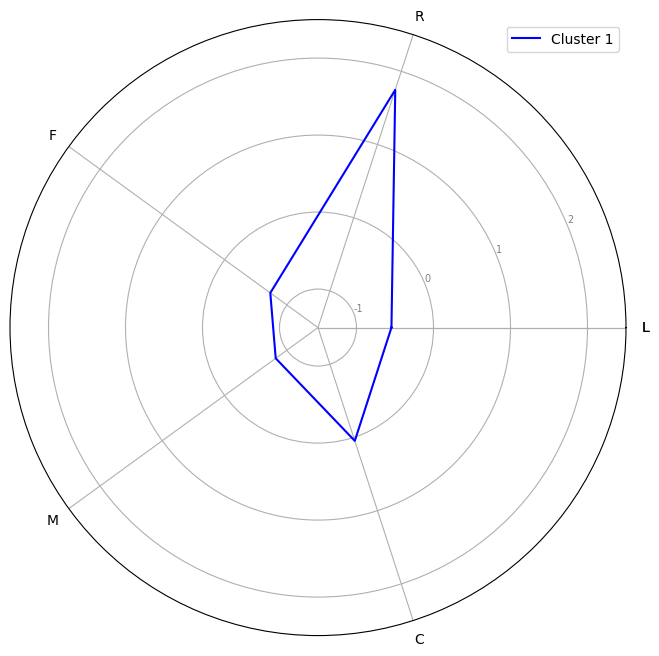

In [54]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[0], color=color[0], label = 'Cluster 1')
plt.legend()
plt.show()

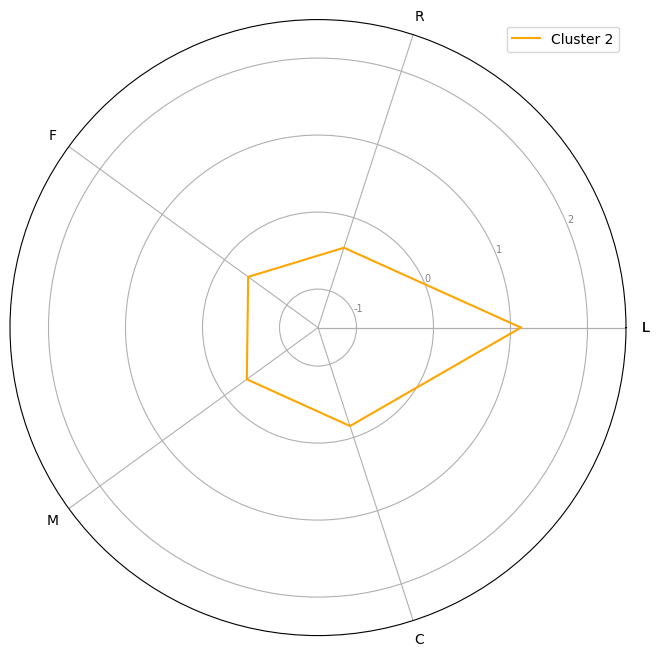

In [55]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[1], color=color[1], label = 'Cluster 2')
plt.legend()
plt.show()

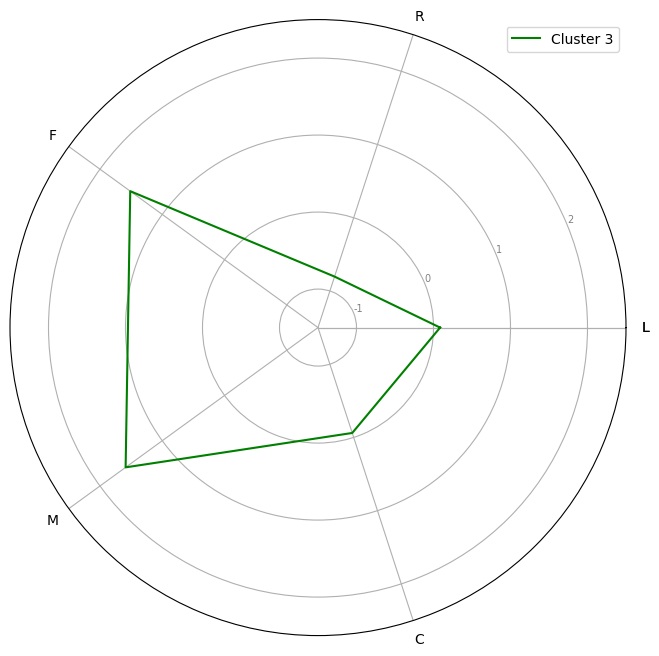

In [56]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[2], color=color[2], label = 'Cluster 3')
plt.legend()
plt.show()

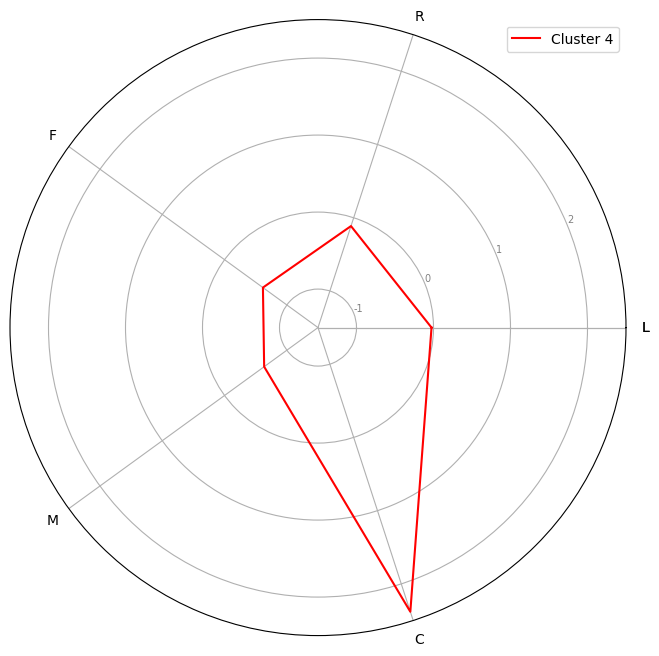

In [57]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[3], color=color[3], label = 'Cluster 4')
plt.legend()
plt.show()

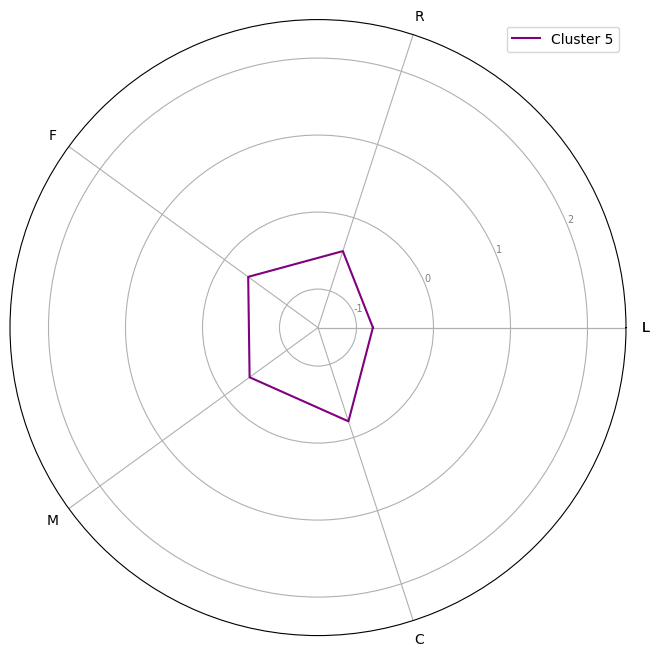

In [58]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[4], color=color[4], label = 'Cluster 5')
plt.legend()
plt.show()

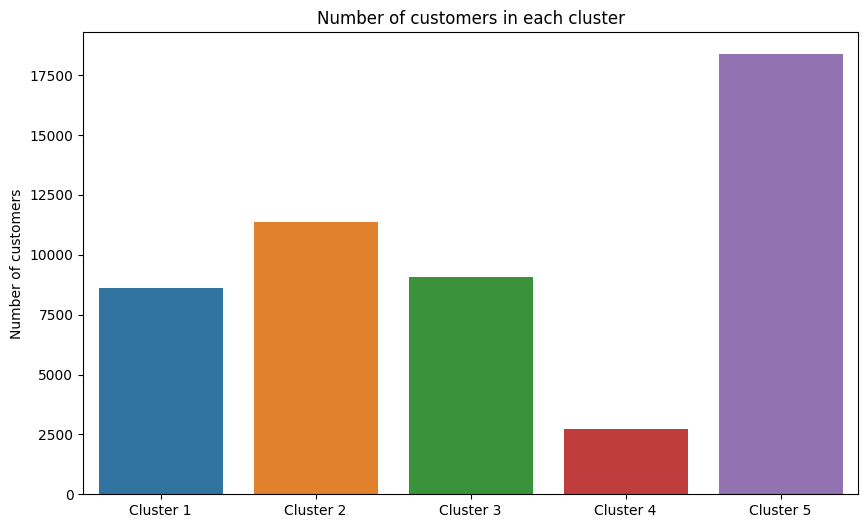

In [59]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=data_std["clusters"])
plt.xticks([0,1,2,3,4], ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"])
plt.title("Number of customers in each cluster")
plt.xlabel("")
plt.ylabel("Number of customers")
plt.show()